# Aula Computacional de CM106 - Otimização I

Nesta aula faremos implementações de métodos básicos de otimização em Julia, e veremos alguns critérios de parada tradicionais.

## Instalação

In [59]:
# Pkg.add("Plots")   <- LAMIND já tem
# Pkg.add("GR")      <- LAMIND já tem
# Pkg.add("CUTEst")
# Pkg.add("BenchmarkProfiles")

## Exemplo básico de Newton

In [1]:
f(x) = (x[1] - 1)^2 + 100 * (x[2] - x[1]^2)^2
g(x) = [2 * (x[1] - 1) - 400 * x[1] * (x[2] - x[1]^2);
         200 * (x[2] - x[1]^2)]
H(x) = [2 - 400 * (x[2] - x[1]^2) + 800 * x[1]^2   -400 * x[1];
        -400 * x[1]  200]

# Ponto inicial
x = [-1.2; 1.0]

2-element Array{Float64,1}:
 -1.2
  1.0

In [2]:
f(x)

24.199999999999996

In [3]:
g(x)

2-element Array{Float64,1}:
 -215.6
  -88.0

In [4]:
H(x)

2×2 Array{Float64,2}:
 1330.0  480.0
  480.0  200.0

In [5]:
using Plots
gr()

Plots.GRBackend()

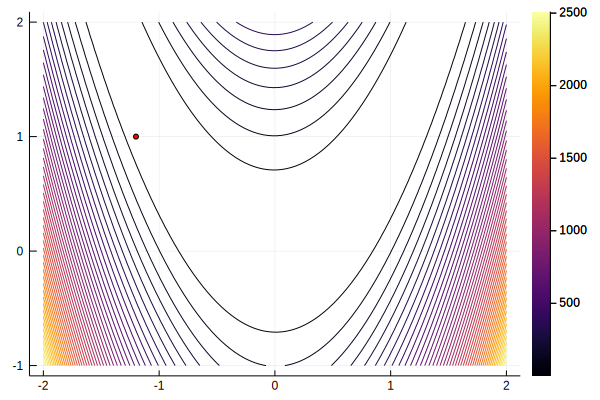

In [6]:
contour(linspace(-2, 2, 100), linspace(-1, 2, 100), (x,y) -> f([x;y]), levels=50)
scatter!([x[1]], [x[2]], c=:red, ms=3, leg=false)

In [7]:
d = -H(x) \ g(x)

2-element Array{Float64,1}:
 0.0247191
 0.380674 

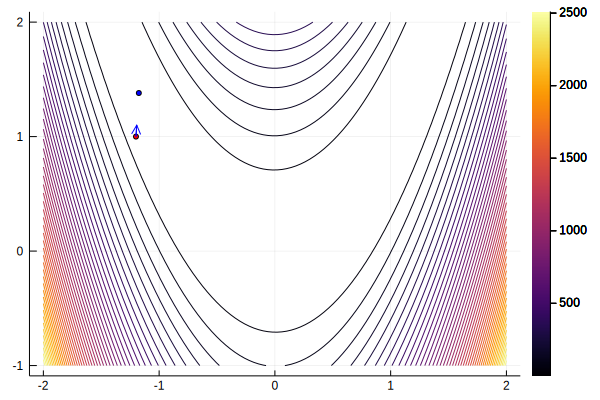

In [8]:
contour(linspace(-2, 2, 100), linspace(-1, 2, 100), (x,y) -> f([x;y]), levels=50)
scatter!([x[1]], [x[2]], c=:red, ms=3, leg=false)
dn = 0.1 * d / norm(d)
plot!([x[1], x[1] + dn[1]], [x[2], x[2] + dn[2]], c=:blue, l=:arrow)
scatter!([x[1] + d[1]], [x[2] + d[2]], c=:blue, ms=3)

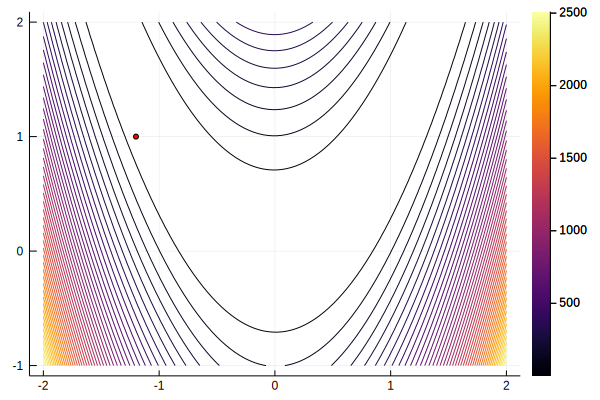

In [9]:
x = [-1.2; 1.0]
contour(linspace(-2, 2, 100), linspace(-1, 2, 100), (x,y) -> f([x;y]), levels=50)
scatter!([x[1]], [x[2]], c=:red, ms=3, leg=false)

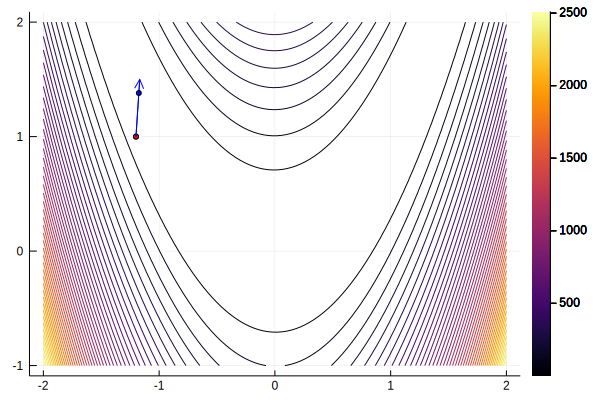

In [10]:
scatter!([x[1]], [x[2]], c=:red, ms=3)
d = -H(x) \ g(x)
dn = 0.5 * d / norm(d)
plot!([x[1], x[1] + dn[1]], [x[2], x[2] + dn[2]], c=:blue, l=:arrow)
x = x + d
scatter!([x[1]], [x[2]], c=:blue, ms=3)

In [11]:
x = [-1.2; 1.0]
iter = 0
while norm(g(x)) > 1e-6
    d = -H(x) \ g(x)
    x = x + d
    iter += 1
end
println("x = $x, ‖∇f(x)‖ = $(norm(g(x))), iter = $iter")

x = [1.0, 1.0], ‖∇f(x)‖ = 8.285705791275366e-9, iter = 6


Em algoritmos computacionais clássicos, devemos nos preocupar em informar o gradiente e a Hessiana da função $f$. Quando algoritmos eram criados há algumas décadas, era necessário criar também algumas funções para comparar esses algoritmos. Essas funções costumavam ser comparilhadas entre autores, para que todos pudessem fazer testes computacionais. Alguns artigos foram publicados descrevendo conjuntos de problemas que poderiam ser úteis em contextos específicos. Eis alguns:
- W. Hock, K. Schittkowski. **Test Examples for Nonlinear Programming Codes**, Springer, 1981
- Jorge J. Moré, Burton S. Garbow, and Kenneth E. Hillstrom. 1981. **Testing Unconstrained Optimization Software.** ACM Trans. Math. Softw. 7, 1 (1981), 17-41. DOI: https://doi.org/10.1145/355934.355936

Em 1995, com a publicação

- I. Bongartz, A. R. Conn, N. I. M. Gould, and Ph. L. Toint. CUTE: Constrained
and Unconstrained Testing Environment. ACM Transactions on Mathematical
Software, 21(1):123–160, 1995.

vários problemas foram colecionados num software que dava acesso à todas as qualidades de um problema de programação não-linear: função objetivo, restrições, gradientes, Hessianas, ponto inicial, etc. Essa biblioteca de testes, **CUTE** teve duas versões seguintes: **CUTEr** e **CUTEst**. Esta última, a mais atual, têm uma interface em Julia, que podemos acessar sem muita dificuldade.

In [12]:
using CUTEst

INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.6/CUTEst.ji for module CUTEst.


In [13]:
nlp = CUTEstModel("ROSENBR")
f(x) = obj(nlp, x)
g(x) = grad(nlp, x)
H(x) = Symmetric(hess(nlp, x), :L) # Só aparece a metade inferior

H (generic function with 1 method)

In [14]:
x = [-1.2; 1.0]

2-element Array{Float64,1}:
 -1.2
  1.0

In [15]:
f(x)

24.199999999999996

In [16]:
g(x)

2-element Array{Float64,1}:
 -215.6
  -88.0

In [17]:
H(x)

2×2 Symmetric{Float64,SparseMatrixCSC{Float64,Int64}}:
 1330.0  480.0
  480.0  200.0

In [18]:
x = nlp.meta.x0
while norm(g(x)) > 1e-6
    d = -H(x) \ g(x)
    x = x + d
end
println("x = $x, ‖∇f(x)‖ = $(norm(g(x)))")

x = [1.0, 1.0], ‖∇f(x)‖ = 8.285705791275366e-9


In [19]:
finalize(nlp)

A interface do CUTEst em Julia, **CUTEst.jl**, só funciona no Linux e no OSX, e não tem previsão de suporte em outras plataformas. Para ainda ter alguma facilidade na criação, é possível usar o **NLPModels.jl**, que dá a base para o CUTEst.jl. Dentre as possibilidades de uso do NLPModels.jl, encontra-se o ADNLPModel, que faz diferenciação automática.

In [20]:
using NLPModels

In [21]:
f(x) = (x[1] - 1.0)^2 + 100 *(x[2] - x[1]^2)^2
nlp = ADNLPModel(f, [-1.2; 1.0]) # (f, x₀)
g(x) = grad(nlp, x)
H(x) = Symmetric(hess(nlp, x), :L)

H (generic function with 1 method)

In [22]:
x = copy(nlp.meta.x0)
while norm(g(x)) > 1e-6
    d = -H(x) \ g(x)
    x = x + d
end
println("x = $x, ‖∇f(x)‖ = $(norm(g(x)))")

x = [1.0, 1.0], ‖∇f(x)‖ = 8.285705791275365e-9


Para mais informações sobre essas ferramentas, visite a documentação delas:
[NLPModels.jl](http://juliasmoothoptimizers.github.io/NLPModels.jl/stable/),
[CUTEst.jl](http://juliasmoothoptimizers.github.io/CUTEst.jl/stable/),
ou os posts sobre NLPModels.jl [deste blog](http://abelsiqueira.github.io/blog/).

Para gerar uma função que receba um destes tipos, podemos fazer

In [23]:
function newton_puro(nlp)
    f(x) = obj(nlp, x)
    g(x) = grad(nlp, x)
    H(x) = Symmetric(hess(nlp, x), :L)
    x = copy(nlp.meta.x0)
    while norm(g(x)) > 1e-6
        d = -H(x) \ g(x)
        x = x + d
    end
    return x
end

newton_puro (generic function with 1 method)

In [24]:
newton_puro(nlp)

2-element Array{Float64,1}:
 1.0
 1.0

# Condições de paradas

Os métodos de otimização que vimos têm alguma garantia de convergência perto da solução, ou em alguns casos, de gerar pontos de acumulação críticos. Em qualquer caso, pode acontecer de o método demorar demais na busca de uma solução, ou de encontrar um obstáculo que não pode ultrapassar. Para evitar que o seu programa tenha um bug, é preciso uma combinação de entendimento computacional e teórico do algoritmo para criar condições de parada adicionais. As mais comuns estão a seguir:

- Máximo de iterações, de avaliação de funções, de tempo decorrido, etc.
- Insatisfação de alguma condição teórica para o funcionamento do método, e.g., positiva da Hessiana em Newton, geração de uma direção que não seja de descida;
- Acontecimento computacional que não deveria acontecer na matemática exata, mas que ocorre devido ao uso de ponto flutuante, .e.g, a Hessiana fica muito próximo de ser singular, o passo de Armijo vira zero, divisão por algum número muito próximo de zero, a direção fica muito perto de ser ortogonal;
- Acontecimentos puramente computacionais, e.g., falta de memória;
- Muitos problemas só são percebidos após a implementação é iniciada, por isso é preciso ficar atento e implementar testes para o seu código.

Algumas das situações acima podem ser "consertadas", ou pela modificação do método, ou pela estabilização do cálculo computacional. Vamos focar no entanto, quando essas coisas acontecem.

## Indicador de Saída - Exit Flag

O comum nessas situações de parada é indicar com alguma variável o que aconteceu. No passado, o costume era retornar $0$ se tudo correu bem, $>0$ para paradas previstas, e $<0$ para exceções.
Hoje em dia podemos retornar texto, ou em algumas linguagens, um `Symbol`, por exemplo `:sucesso`, `:max_iter`, `:max_tempo`, etc.

## Cholesky

A decomposição de Cholesky verifica se $A$ é definida positiva, e se for cria uma matriz $G$ tal que
$A = G^TG$. Podemos resolver o sistema $Ax = b$ através de $x = G^{-1}G^{-T}b$. (Ver Análise Numérica para a maneira correta de fazer isso).

In [25]:
function newton_puro(nlp;
                     max_time = 60.0,
                     max_evals = 10000)
    f(x) = obj(nlp, x)
    g(x) = grad(nlp, x)
    H(x) = Symmetric(hess(nlp, x), :L)
    x = copy(nlp.meta.x0)
    
    tempo_0 = time()
    Δt = time() - tempo_0
    
    gx = g(x)
    normgx = norm(g(x))
    
    exitflag = :desconhecido
    sucesso = normgx < 1e-6
    cansado = Δt > max_time || sum_counters(nlp) > max_evals
    
    while !(sucesso || cansado)
        local G
        try
            G = chol(H(x))
        catch ex
            if isa(ex, LinAlg.PosDefException)
                exitflag = :nao_eh_pos_def
            else
                # Erro desconhecido
                exitflag = :excecao
            end
            break
        end
        d = -( G \ (G' \ gx) )
        x = x + d
        gx = g(x)
        normgx = norm(g(x))
        
        Δt = time() - tempo_0
        sucesso = normgx < 1e-6
        cansado = Δt > max_time || sum_counters(nlp) > max_evals
    end
    if sucesso
        exitflag = :sucesso
    elseif cansado
        if Δt > max_time
            exitflag = :max_time
        else
            exitflag = :max_evals
        end
    end
    
    return x, f(x), normgx, Δt, sum_counters(nlp), exitflag
end

newton_puro (generic function with 1 method)

In [26]:
reset!(nlp)
newton_puro(nlp)

([1.0, 1.0], 3.4326461875363225e-20, 8.285705791275365e-9, 0.15861296653747559, 21, :sucesso)

In [27]:
reset!(nlp)
newton_puro(nlp, max_evals=3)

([-1.17528, 1.38067], 4.731884325266608, 4.639426214066862, 0.0002510547637939453, 6, :max_evals)

In [28]:
# Neste exemplo, a Hessiana não é definida positiva
f(x) = (x[1] - 1.0)^2 + 100 *(x[2] - x[1]^2)^2
nlp = ADNLPModel(f, [-0.1; 1.0])
g(x) = grad(nlp, x)
H(x) = Symmetric(hess(nlp, x), :L)

H (generic function with 1 method)

In [29]:
reset!(nlp)
newton_puro(nlp, max_evals=3)

([-0.1, 1.0], 99.21999999999998, 201.50126550471091, 0.0, 4, :nao_eh_pos_def)

Veja que o método, mesmo o mais simples, ficará comprido quando adicionamos as condições de paradas específicas.

# Método do Gradiente com Busca Inexata de Armijo

In [30]:
function maxima_descida(nlp;
                        tol_abs = 1e-8,
                        tol_rel = 1e-6,
                        max_time = 60.0,
                        max_evals = 100000,
                        armijo_param = 0.5,
                        backtrack_param = 0.5
                        )
    f(x) = obj(nlp, x)
    g(x) = grad(nlp, x)
    
    x = copy(nlp.meta.x0)
    
    tempo_0 = time()
    Δt = time() - tempo_0
    
    fx = f(x)
    gx = g(x)
    normgx = norm(gx)
    ϵ = tol_abs + normgx * tol_rel
    
    exitflag = :desconhecido
    sucesso = normgx < ϵ
    cansado = Δt > max_time || sum_counters(nlp) > max_evals
    
    while !(sucesso || cansado)
        # Direção -gx, não preciso criar um vetor a mais pra isso
        # Backtracking
        t = 1.0
        xt = x - gx
        ft = f(xt)
        prodint = -norm(gx)^2 # dot(d,gx) = dot(-gx,gx) = -‖gx‖²
        while !(ft < fx + armijo_param * t * prodint)
            t = t * backtrack_param
            xt = x - t * gx
            ft = f(xt)
            if t < 1e-20
                exitflag = :passo_muito_pequeno 
                break
            end
        end
        if exitflag != :desconhecido
            break
        end
        
        # x + t d já foi calculado
        x = xt
        fx = ft
        gx = g(x)
        normgx = norm(gx)
        
        Δt = time() - tempo_0
        sucesso = normgx < ϵ
        cansado = Δt > max_time || sum_counters(nlp) > max_evals
    end
    if sucesso
        exitflag = :sucesso
    elseif cansado
        if Δt > max_time
            exitflag = :max_time
        else
            exitflag = :max_evals
        end
    end
    
    return x, f(x), normgx, Δt, sum_counters(nlp), exitflag
end

maxima_descida (generic function with 1 method)

In [31]:
reset!(nlp)
maxima_descida(nlp)

([0.999781, 0.99956], 4.818884916020874e-8, 0.0001963889430200807, 0.03975820541381836, 11626, :sucesso)

In [32]:
using Interact, Plots
gr()

INFO: Interact.jl: using new nbwidgetsextension protocol


Plots.GRBackend()

In [33]:
#nlp = ADNLPModel(x->(x[1] + 1.0)^2 + (x[2] - 2.0)^2 / 4, ones(2))
#nlp = ADNLPModel(x->x[1]^3 - 3 * x[1] + x[2]^2, [1.6; 0.0])
nlp = ADNLPModel(x->x[1]^3 - 3 * x[1] + x[2]^2, [1.5; 0.0])
f(x) = obj(nlp, x)
g(x) = grad(nlp, x)

g (generic function with 1 method)

### Visualização de Armijo

Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.5 Float64 , "α", 0.5, "0.5", 50, Interact.OptionDict(DataStructures.OrderedDict("0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09,"0.1"=>0.1…), Dict(0.54=>"0.54",0.86=>"0.86",0.09=>"0.09",0.35=>"0.35",0.22=>"0.22",0.38=>"0.38",0.56=>"0.56",0.2=>"0.2",0.89=>"0.89",0.06=>"0.06"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 0.5 Float64 , "τ", 0.5, "0.5", 5, Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9), Dict(0.4=>"0.4",0.7=>"0.7",0.3=>"0.3",0.5=>"0.5",0.2=>"0.2",0.9=>"0.9",0.1=>"0.1",0.8=>"0.8",0.6=>"0.6")), Any[], Any[], true, "horizontal", true)

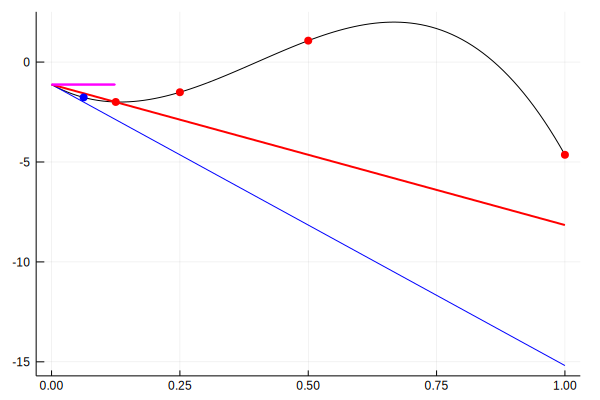

In [34]:
x = nlp.meta.x0
fx = f(x)
d = -g(x)
ϕ(t) = f(x + t * d)
L(t) = fx - t * dot(d, d)
tdom = linspace(0.0, 1.0, 101)
zeroum = [0.0; 1.0]
@manipulate for α = 0.01:0.01:0.99, τ = 0.1:0.1:0.9
    plot(tdom, ϕ.(tdom), c=:black, leg=false)
    plot!(zeroum, L.(zeroum), c=:blue)
    Lα(t) = fx - α * t * dot(d, d)
    plot!(zeroum, Lα.(zeroum), c=:red, lw=2)
    t = 1.0
    while !(ϕ(t) < Lα(t))
        scatter!([t], [ϕ(t)], c=:red, ms=5, m=stroke(0))
        t *= τ
    end
    
    acc = [xi for xi in linspace(0.0, 1.0, 1001) if ϕ(xi) < Lα(xi)]
    scatter!(acc, L(0) * ones(acc), c=:magenta, ms=2, m=stroke(0))
    
    scatter!([t], [ϕ(t)], c=:blue, ms=5, m=(stroke(0)))
end

In [35]:
nlp = ADNLPModel(x->(x[1] - 1.0)^2 + 4 * (x[2] - x[1]^2)^2, [-1.2; 1.0])
#nlp = ADNLPModel(x->(x[1] - 1.0)^2 + 4 * (x[2] - 0.5)^2, [-1.2; 1.0])
f(x) = obj(nlp, x)
g(x) = grad(nlp, x)

g (generic function with 1 method)

Interact.Options{:ToggleButtons,Float64}(7: "input-3" = 0.01 Float64 , "α", 0.01, "0.01", 1, Interact.OptionDict(DataStructures.OrderedDict("0.01"=>0.01,"0.5"=>0.5), Dict(0.01=>"0.01",0.5=>"0.5")), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(9: "input-4" = 0.5 Float64 , "τ", 0.5, "0.5", 2, Interact.OptionDict(DataStructures.OrderedDict("0.25"=>0.25,"0.5"=>0.5,"0.75"=>0.75), Dict(0.5=>"0.5",0.25=>"0.25",0.75=>"0.75")), Any[], Any[], true, "horizontal", true)

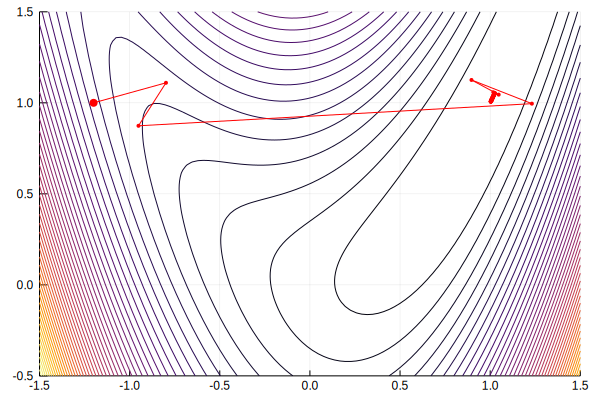

In [36]:
X = linspace(-1.5, 1.5, 100)
Y = linspace(-0.5, 1.5, 100)
α = 0.5
τ = 0.25

@manipulate for α = [1e-2; 0.5], τ = 0.25:0.25:0.75
    x = copy(nlp.meta.x0)
    contour(X, Y, (x,y)->f([x;y]), levels=50, leg=false)
    scatter!([x[1]], [x[2]], c=:red, ms=5, m=(stroke(0)))
    for n = 1:100
        fx = f(x)
        d = -g(x)
        normd = dot(d, d)
        t = 1.0
        xt = x + t * d
        ft = f(xt)
        while !(ft < fx - α * t * normd)
            t *= τ
            xt .= x + t * d
            ft = f(xt)
        end
        plot!([x[1]; xt[1]], [x[2]; xt[2]], c=:red)
        scatter!([xt[1]], [xt[2]], c=:red, ms=3, m=(stroke(0)))
        x .= xt
        fx = ft
    end
    xlims!(extrema(X)...)
    ylims!(extrema(Y)...)
    scatter!()
end

### Cauchy para quadráticas

Interact.Options{:SelectionSlider,Float64}(13: "input-5" = 0.0 Float64 , "x0", 0.0, "0.0", 16, Interact.OptionDict(DataStructures.OrderedDict("-1.5"=>-1.5,"-1.4"=>-1.4,"-1.3"=>-1.3,"-1.2"=>-1.2,"-1.1"=>-1.1,"-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6…), Dict(1.0=>"1.0",0.3=>"0.3",1.2=>"1.2",-0.2=>"-0.2",-1.0=>"-1.0",1.5=>"1.5",-1.3=>"-1.3",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(15: "input-6" = 0.5 Float64 , "y0", 0.5, "0.5", 16, Interact.OptionDict(DataStructures.OrderedDict("-0.5"=>-0.5,"-0.43333333333333335"=>-0.433333,"-0.36666666666666664"=>-0.366667,"-0.3"=>-0.3,"-0.23333333333333334"=>-0.233333,"-0.16666666666666666"=>-0.166667,"-0.1"=>-0.1,"-0.03333333333333333"=>-0.0333333,"0.03333333333333333"=>0.0333333,"0.1"=>0.1…), Dict(1.16667=>"1.1666666666666667",0.3=>"0.3",-0.366667=>"-0.36666666666666664",0.433333=>"0.43333333333333335",1.5=>"1.5",-0.3=>"-0.3",-0.233333=>"-0.23333333333333334",0.633333=>"0.6333333333333333",0.0333333=>"0.03333333333333333",0.366667=>"0.36666666666666664"…)), Any[], Any[], true, "horizontal", true)

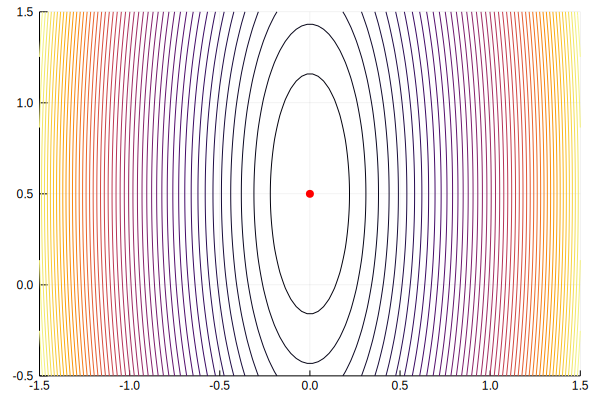

In [37]:
Q = [9 0; 0 1]
v = Q * [0.0; -0.5]
f(x) = 0.5 * dot(x, Q * x) + dot(v, x)
X = linspace(-1.5, 1.5, 100)
Y = linspace(-0.5, 1.5, 100)

@manipulate for x0 = linspace(-1.5, 1.5, 31), y0 = linspace(-0.5, 1.5, 31)
    contour(X, Y, (x,y)->f([x;y]), levels=50, leg=false)
    scatter!([x0], [y0], c=:red, ms=5, m=(stroke(0)))
    x = [x0; y0]
    for n = 1:30
        d = -(Q * x + v)
        λ = dot(d,d) / dot(d, Q*d)
        xt = x + λ * d
        plot!([x[1]; xt[1]], [x[2]; xt[2]], c=:red)
        scatter!([xt[1]], [xt[2]], c=:red, ms=3, m=(stroke(0)))
        xlims!(extrema(X)...)
        ylims!(extrema(Y)...)
        x .= xt
    end
    scatter!()
end

## Gradientes Conjugados

Interact.Options{:SelectionSlider,Float64}(19: "input-7" = 0.0 Float64 , "x0", 0.0, "0.0", 16, Interact.OptionDict(DataStructures.OrderedDict("-1.5"=>-1.5,"-1.4"=>-1.4,"-1.3"=>-1.3,"-1.2"=>-1.2,"-1.1"=>-1.1,"-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6…), Dict(1.0=>"1.0",0.3=>"0.3",1.2=>"1.2",-0.2=>"-0.2",-1.0=>"-1.0",1.5=>"1.5",-1.3=>"-1.3",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(21: "input-8" = 0.5 Float64 , "y0", 0.5, "0.5", 16, Interact.OptionDict(DataStructures.OrderedDict("-0.5"=>-0.5,"-0.43333333333333335"=>-0.433333,"-0.36666666666666664"=>-0.366667,"-0.3"=>-0.3,"-0.23333333333333334"=>-0.233333,"-0.16666666666666666"=>-0.166667,"-0.1"=>-0.1,"-0.03333333333333333"=>-0.0333333,"0.03333333333333333"=>0.0333333,"0.1"=>0.1…), Dict(1.16667=>"1.1666666666666667",0.3=>"0.3",-0.366667=>"-0.36666666666666664",0.433333=>"0.43333333333333335",1.5=>"1.5",-0.3=>"-0.3",-0.233333=>"-0.23333333333333334",0.633333=>"0.6333333333333333",0.0333333=>"0.03333333333333333",0.366667=>"0.36666666666666664"…)), Any[], Any[], true, "horizontal", true)

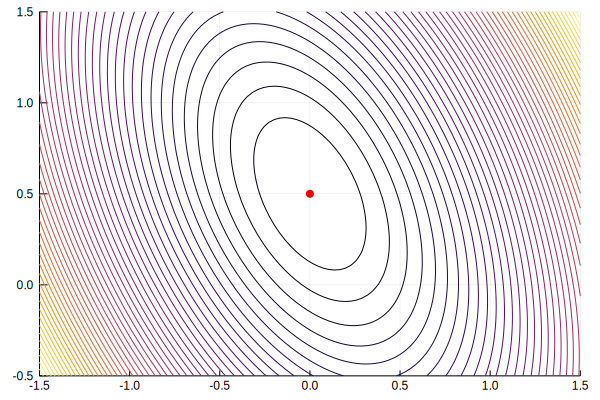

In [38]:
Q = [9 3; 3 5]
v = Q * [0.0; -0.5]
f(x) = 0.5 * dot(x, Q * x) + dot(v, x)
X = linspace(-1.5, 1.5, 100)
Y = linspace(-0.5, 1.5, 100)

@manipulate for x0 = linspace(-1.5, 1.5, 31), y0 = linspace(-0.5, 1.5, 31)
    contour(X, Y, (x,y)->f([x;y]), levels=50, leg=false)
    scatter!([x0], [y0], c=:red, ms=5, m=(stroke(0)))
    x = [x0; y0]
    r = Q * x + v
    rr = dot(r, r)
    d = -r
    while rr > 1e-4
        Qd = Q * d
        α = dot(r, r) / dot(d, Qd)
        plot!([x[1]; x[1] + α * d[1]], [x[2]; x[2] + α * d[2]], c=:red)
        x = x + α * d
        scatter!([x[1]], [x[2]], c=:red, ms=3, m=(stroke(0)))
        r += α * Qd
        rr2 = dot(r, r)
        β = rr2 / rr
        d = -r + β * d
        rr = rr2
    end
    
    xlims!(extrema(X)...)
    ylims!(extrema(Y)...)
    scatter!()
end

### BFGS com busca linear por Armijo

A atualização de BFGS para a inversa da Hessiana é
$$
H_{k+1} = (I - \rho_k s_k y_k^T) H_k (I - \rho_k y_k s_k^T) + \rho_k s_k s_k^T,
$$
com $\rho_k = \dfrac{1}{y_k^Ts_k}$.

In [39]:
function bfgs_busca_linear(nlp;
                           armijo_param = 0.5,
                           backtrack_param = 0.5,
                           max_time = 60.0,
                           max_evals = 10000)
    f(x) = obj(nlp, x)
    g(x) = grad(nlp, x)

    x = copy(nlp.meta.x0)
    n = length(x)
    
    H = eye(n) # Definitivamente não é a melhor maneira
    
    tempo_0 = time()
    Δt = time() - tempo_0
    
    fx = f(x)
    gx = g(x)
    normgx = norm(g(x))
    
    exitflag = :desconhecido
    sucesso = normgx < 1e-6
    cansado = Δt > max_time || sum_counters(nlp) > max_evals
    
    while !(sucesso || cansado)
        d = -H * gx
        t = 1.0
        xt = x + d
        ft = f(xt)
        prodint = dot(d, gx)
        # Devemos ter dᵀ∇f(x) < 0
        if prodint ≥ 0
            exitflag = :direcao_nao_descida
            break
        end
        while !(ft < fx + armijo_param * t * prodint)
            t = t * backtrack_param
            xt = x + t * d
            ft = f(xt)
            if t < 1e-20
                exitflag = :passo_muito_pequeno
                break
            end
        end
        if exitflag != :desconhecido
            break
        end

        x .= xt
        fx = ft
        gt = g(x)
        
        # BFGS Update
        # s = t d
        y = gt - gx
        yᵀs = t * dot(y, d)
        if yᵀs > 0
            ρ = 1 / yᵀs
            M = eye(n) - t * ρ * d * y'
            H = M * H * M' + (t^2 * ρ) * d * d'
        end
        
        gx .= gt
        normgx = norm(g(x))
        
        Δt = time() - tempo_0
        sucesso = normgx < 1e-6
        cansado = Δt > max_time || sum_counters(nlp) > max_evals
    end
    if sucesso
        exitflag = :sucesso
    elseif cansado
        if Δt > max_time
            exitflag = :max_time
        else
            exitflag = :max_evals
        end
    end
    
    return x, f(x), normgx, Δt, sum_counters(nlp), exitflag
end

bfgs_busca_linear (generic function with 1 method)

In [40]:
nlp = CUTEstModel("BARD")
output = bfgs_busca_linear(nlp)
finalize(nlp)
output

([0.0824106, 1.13304, 2.3437], 0.008214877306579164, 1.0453406638902214e-7, 0.0001761913299560547, 76, :sucesso)

In [41]:
nlp = CUTEstModel("MISRA1ALS")
try
    bfgs_busca_linear(nlp)
finally
    finalize(nlp)
end

([238.942, 0.000550156], 0.12455138894439598, 1.2173113646029137e-6, 0.0004520416259765625, 264, :passo_muito_pequeno)

# Comparações

In [42]:
problemas = CUTEst.select(max_var = 2, max_con = 0, only_free_var=true)
sort!(problemas)
mtds = [maxima_descida, bfgs_busca_linear, newton_puro]

@printf("%-10s | ", "Problema")
for mtd in mtds
    @printf("%27s | ", mtd)
end
println("")
@printf("%10s | ", "")
for mtd in mtds
    @printf("%9s  %8s  %6s | ",
            "f(x)", "Δt", "Σ#f")
end
println("")

np, nmtds = length(problemas), length(mtds)
fx_matriz = zeros(np, nmtds)
Δt_matriz = zeros(np, nmtds)
Σf_matriz = zeros(Int, np, nmtds)
for (i,p) in enumerate(problemas)
    @printf("%-10s | ", p)
    nlp = CUTEstModel(p)
    try
        for (j,mtd) in enumerate(mtds)
            try
                reset!(nlp)
                x, fx, normgx, Δt, Σf, exitflag = mtd(nlp, max_evals = 10_000, max_time = 3.0)
                @printf("%+8.2e  %8.2e  %6d | ", fx, Δt, Σf)
                fx_matriz[i,j] = fx
                Δt_matriz[i,j] = Δt
                Σf_matriz[i,j] = Σf
            catch ex
                @printf("%27s | ", "ERROR")
                fx_matriz[i,j] = Inf
                Δt_matriz[i,j] = Inf
                Σf_matriz[i,j] = 2^16
                throw(ex)
            end
        end
        println("")
    catch ex
        println(ex)
    finally
        finalize(nlp)
    end
end

Problema   |              maxima_descida |           bfgs_busca_linear |                 newton_puro | 
           |      f(x)        Δt     Σ#f |      f(x)        Δt     Σ#f |      f(x)        Δt     Σ#f | 
AKIVA      |     -Inf  4.82e-05      73 |     -Inf  7.20e-05      75 | +6.17e+00  4.36e-04      21 | 
BEALE      | +1.07e-09  2.66e-03    3049 | +1.41e-16  7.80e-05      54 | +1.42e+01  9.54e-07       4 | 
BOXBODLS   | +1.93e+03  9.49e-03   10017 | +1.17e+03  1.24e-04     156 | +1.86e+05  0.00e+00       4 | 
BRKMCC     | +1.69e-01  5.38e-04     702 | +1.69e-01  4.29e-05      35 | +1.69e-01  3.41e-05      12 | 
BROWNBS    | +5.62e+11  4.71e-03   10019 | +1.88e-25  1.81e-04     184 | +5.00e+11  2.19e-05       7 | 
CLIFF      | +4.54e+02  1.67e-04     313 | +2.00e-01  2.40e-04     192 | +2.00e-01  1.52e-04      84 | 
CUBE       | +7.02e-03  1.31e-02   10008 | +6.66e-15  2.60e-04     236 | +4.55e+03  2.72e-05      10 | 
DANWOODLS  | +2.93e-01  2.61e-02   10002 | +4.32e-03  3.82e-04    

Newton é muito melhor? Menos tempo e menos avaliações de funções, mas vejo o valor de função objetivo. Muitas vezes Newton não vai para o ótimo, e muitas vezes quebra antes.

Além de verificar o tempo ou avaliações de função, devemos garantir que os métodos funcionaram. Uma maneira de verificar isso, neste caso, é decidir que um algoritmo convergiu para a solução ótima se
$$ f \leq f_{\min} + \left\vert f_{\min}\right\vert \varepsilon_{R} + \varepsilon_{A},$$
onde $f$ é o valor de função de um algoritmo, $f_{\min}$ é o menor valor de função encontrado por qualquer algoritmo, e $\varepsilon_R$ e $\varepsilon_A$ são tolerâncias. Por exemplo, $\varepsilon_{R} = 10^{-3}$
e $\varepsilon_{A} = 10^{-6}$.

In [43]:
@printf("%-10s | ", "Problema")
for mtd in mtds
    @printf("%27s | ", mtd)
end
println("")
@printf("%10s | ", "")
for mtd in mtds
    @printf("%9s  %8s  %6s | ",
            "f(x)", "Δt", "Σ#f")
end
println("")

epsR, epsA = 1e-3, 1e-6
for i = 1:np
    @printf("%-10s | ", problemas[i])
    fmin = minimum(fx_matriz[i,:])
    for j = 1:nmtds
        fx, Δt, Σf = fx_matriz[i,j], Δt_matriz[i,j], Σf_matriz[i,j]
        if fx < fmin + abs(fmin) * epsR + epsA
            @printf("%+8.2e  %8.2e  %6d | ", fx, Δt, Σf)
        else
            @printf("%27s | ", "Falhou")
        end
    end
    println("")
end


Problema   |              maxima_descida |           bfgs_busca_linear |                 newton_puro | 
           |      f(x)        Δt     Σ#f |      f(x)        Δt     Σ#f |      f(x)        Δt     Σ#f | 
AKIVA      |                      Falhou |                      Falhou |                      Falhou | 
BEALE      | +1.07e-09  2.66e-03    3049 | +1.41e-16  7.80e-05      54 |                      Falhou | 
BOXBODLS   |                      Falhou | +1.17e+03  1.24e-04     156 |                      Falhou | 
BRKMCC     | +1.69e-01  5.38e-04     702 | +1.69e-01  4.29e-05      35 | +1.69e-01  3.41e-05      12 | 
BROWNBS    |                      Falhou | +1.88e-25  1.81e-04     184 |                      Falhou | 
CLIFF      |                      Falhou | +2.00e-01  2.40e-04     192 | +2.00e-01  1.52e-04      84 | 
CUBE       |                      Falhou | +6.66e-15  2.60e-04     236 |                      Falhou | 
DANWOODLS  |                      Falhou | +4.32e-03  3.82e-04  

Então **BFGS é o melhor**? Não necessariamente. Máxima descida é realmente mais fraco, mas nossa implementação de Newton foi inocente em achar que a Hessiana sempre seria definida positiva. Podemos fazer algumas modificações em Newton para aumentar suas chances de convergência.

Outro ponto de comparação é a velocidade de Newton quando funciona. Ele faz uma troca de **eficiência** por **robustez**. Isso fica pouco evidente na tabela acima, então vamos usar um gráfico específico.

## Perfil de Desempenho

O perfil de desempenho é um gráfico de comparação de algoritmos útil quando existe uma troca de eficiência e robustez. Em geral ele não é muito útil para algoritmos que sempre convergem.

A ideia do perfil de desempenho é "normalizar" a comparação. Problemas menores tendem a ser resolvidos mais rápido, enquanto problemas maiores podem demorar vários minutos. Nessa situação, 1 minuto de diferença pode ser muito ou pouco.

A normalização do perfil se dá pela divisão de cada custo pelo menor custo. Por exemplo, imagine que a matriz $T$ abaixo é uma matriz de comparação de tempo de 3 algoritmos (como $\Delta t$ acima). Cada linha corresponde a um problema diferente.

In [44]:
T = rand(15, 3) .* (1:15)

15×3 Array{Float64,2}:
 0.915015   0.460144  0.244207
 0.704375   0.866013  0.666327
 2.36328    2.80603   0.153257
 3.7452     1.32371   0.104274
 3.49       0.7744    1.35516 
 1.15348    0.488405  4.34483 
 3.14315    5.489     1.06401 
 5.64747    4.64712   4.71373 
 2.22048    3.12492   1.47759 
 8.14658    7.64155   0.675545
 5.28612    0.087444  8.99297 
 0.488683   4.45772   6.91604 
 2.65188    2.98371   2.23596 
 9.01637   11.2241    7.30324 
 2.49772    7.99877   0.32849 

Aqui podemos ter algumas problemas que não convergem. Podemos denotá-los colocando $\infty$ nos valores correspondentes em $T$.

In [45]:
T[[7;11;13;19;23]] = Inf

Inf

In [46]:
T

15×3 Array{Float64,2}:
   0.915015    0.460144  0.244207
   0.704375    0.866013  0.666327
   2.36328     2.80603   0.153257
   3.7452    Inf         0.104274
   3.49        0.7744    1.35516 
   1.15348     0.488405  4.34483 
 Inf           5.489     1.06401 
   5.64747   Inf         4.71373 
   2.22048     3.12492   1.47759 
   8.14658     7.64155   0.675545
 Inf           0.087444  8.99297 
   0.488683    4.45772   6.91604 
 Inf           2.98371   2.23596 
   9.01637    11.2241    7.30324 
   2.49772     7.99877   0.32849 

O menor tempo de cada problema é calculado:

In [47]:
Tmin = minimum(T, 2)

15×1 Array{Float64,2}:
 0.244207
 0.666327
 0.153257
 0.104274
 0.7744  
 0.488405
 1.06401 
 4.71373 
 1.47759 
 0.675545
 0.087444
 0.488683
 2.23596 
 7.30324 
 0.32849 

A partir daí a razão é calculada:

In [48]:
R = T ./ Tmin

15×3 Array{Float64,2}:
   3.74688    1.88424    1.0    
   1.0571     1.29968    1.0    
  15.4203    18.3093     1.0    
  35.9169   Inf          1.0    
   4.50672    1.0        1.74995
   2.36174    1.0        8.89597
 Inf          5.15876    1.0    
   1.19809  Inf          1.0    
   1.50277    2.11487    1.0    
  12.0593    11.3117     1.0    
 Inf          1.0      102.843  
   1.0        9.1219    14.1524 
 Inf          1.33442    1.0    
   1.23457    1.53687    1.0    
   7.60366   24.3502     1.0    

Veja que sempre temos ao menos um problema com custo relativo $1$, a não ser que todos os problemas falhem.

A partir destes custos, definimos a função do perfil:
$$ \rho_a(t) = \dfrac{\#\{p \ | \ r_{a,p} \leq t\}}{NP}, $$
onde $r_{a,p}$ é a razão do problema $p$ do algoritmo $a$, e $NP$ é o número de problemas.
Em outras palavras, $\rho_a(t)$ mede, para o algoritmo $a$, quantos problemas foram resolvidos com custo relativo até $t$. Veja que $t = 1$ é o menor possível, então representa quantos problemas o algoritmo $a$ resolveu mais rápido que os adversários. Para $t \to \infty$, $\rho_a(t)$ corresponde a quantos problemas o algoritmo $a$ resolveu. Definimos esses dois valores:
- Eficiência: $\rho_a(1)$;
- Robustez: $\displaystyle\lim_{t \to \infty} \rho_a(t)$.

Note que $\rho_a$ vai de $0$ a $1$, e que é descontínua.

In [49]:
τ = sort(unique(R))

27-element Array{Float64,1}:
   1.0    
   1.0571 
   1.19809
   1.23457
   1.29968
   1.33442
   1.50277
   1.53687
   1.74995
   1.88424
   2.11487
   2.36174
   3.74688
   ⋮      
   7.60366
   8.89597
   9.1219 
  11.3117 
  12.0593 
  14.1524 
  15.4203 
  18.3093 
  24.3502 
  35.9169 
 102.843  
 Inf      

In [50]:
if τ[end] == Inf
    τ = τ[1:end-1]
end

26-element Array{Float64,1}:
   1.0    
   1.0571 
   1.19809
   1.23457
   1.29968
   1.33442
   1.50277
   1.53687
   1.74995
   1.88424
   2.11487
   2.36174
   3.74688
   4.50672
   5.15876
   7.60366
   8.89597
   9.1219 
  11.3117 
  12.0593 
  14.1524 
  15.4203 
  18.3093 
  24.3502 
  35.9169 
 102.843  

In [51]:
np = size(R, 1)
P = zeros(length(τ), 3)
for (i,τi) = enumerate(τ)
    for j = 1:3
        P[i,j] = sum(R[:,j] .<= τi) / np
    end
end

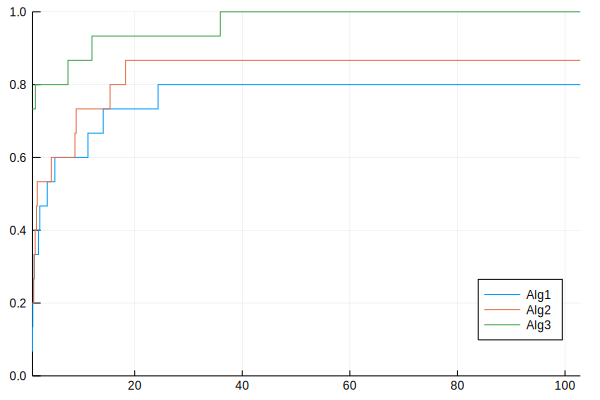

In [52]:
plot(τ, P, t=:steppre, leg=:bottomright, lab=["Alg1", "Alg2", "Alg3"])
ylims!(0, 1)

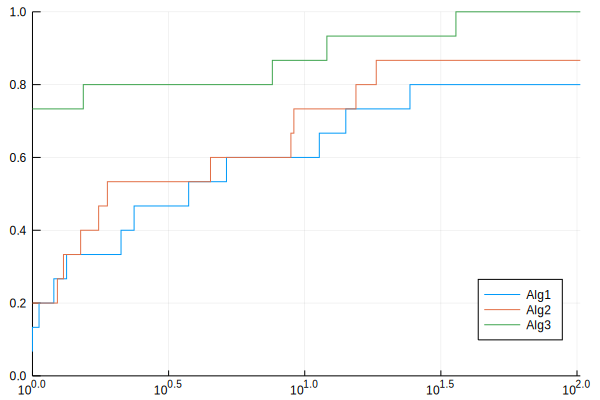

In [53]:
plot(τ, P, t=:steppre, leg=:bottomright, lab=["Alg1", "Alg2", "Alg3"], xaxis=:log)
ylims!(0, 1)

O pacote `BenchmarkProfiles` tem um perfil de desempenho implementado.

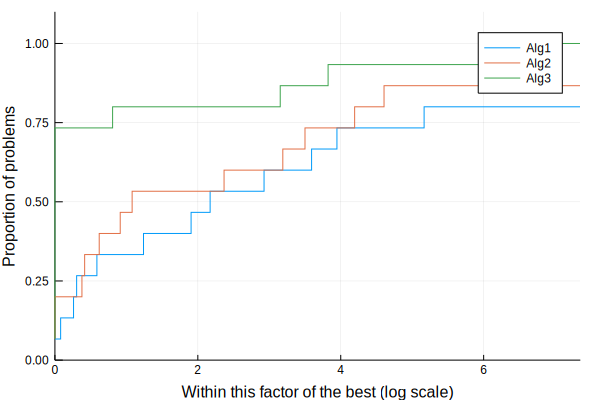

In [54]:
using BenchmarkProfiles

performance_profile(T, ["Alg1", "Alg2", "Alg3"])

### Perfil de desempenho dos algoritmos que fizemos

In [55]:
epsR, epsA = 1e-3, 1e-6
np = size(fx_matriz, 1)
funcionou = fill(false, np, nmtds)
for i = 1:np
    fmin = minimum(fx_matriz[i,:])
    for j = 1:nmtds
        fx, Δt, Σf = fx_matriz[i,j], Δt_matriz[i,j], Σf_matriz[i,j]
        funcionou[i,j] = fx < fmin + abs(fmin) * epsR + epsA
    end
end

In [56]:
P = Δt_matriz + (.!funcionou) * Inf

36×3 Array{Float64,2}:
 Inf            Inf            Inf          
   0.00265884     7.79629e-5   Inf          
 Inf              0.000123978  Inf          
   0.000537872    4.29153e-5     3.40939e-5 
 Inf              0.00018096   Inf          
 Inf              0.000240088    0.000152111
 Inf              0.000259876  Inf          
 Inf              0.000381947  Inf          
   0.000132084    7.08103e-5     4.98295e-5 
   0.000102043    0.000185013  Inf          
   0.000133038    0.000175953    7.10487e-5 
   0.0393739      9.08375e-5     7.08103e-5 
   0.011786       0.00737715   Inf          
   ⋮                                        
 Inf              0.000386       0.000153065
 Inf              0.000393867  Inf          
 Inf              0.000247002  Inf          
 Inf              0.000234127  Inf          
 Inf              0.000203848  Inf          
 Inf              0.000804901  Inf          
 Inf              0.000281096    7.29561e-5 
   8.10623e-5     7.9155e-5     

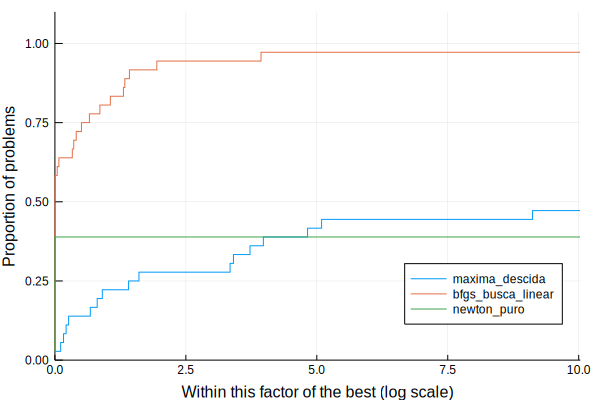

In [57]:
P = Δt_matriz + (.!funcionou) * Inf # Truques
performance_profile(P, string.(mtds), leg=:bottomright)

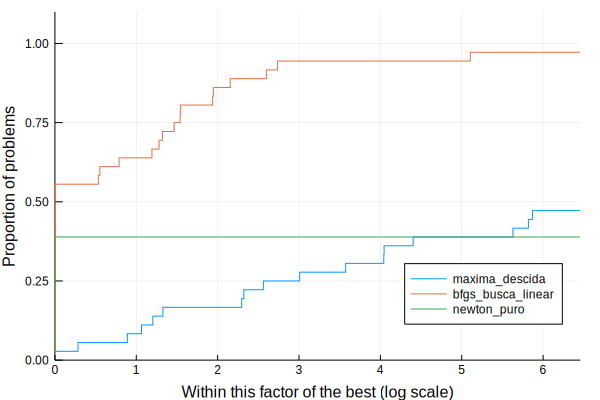

In [58]:
P = Σf_matriz + (.!funcionou) * Inf
performance_profile(P, string.(mtds), leg=:bottomright)

# Exercícios

- Pegue o método de Newton puro, e crie a partir dele o Newton com salvaguarda: Se Cholesky falhar, use a direção do gradiente. Além disso, coloque no Newton a busca inexata de Armijo.